# Pymaceuticals Inc.
---

### Analysis

- Tumor growth in mice was analysed under different treatment regimes
- Tumor growth was evident in total mouse weight
- Four different treatment regimes were compared: Capomulin, Ramicane, Infubinol, and Ceftamin
- Of these, Capomulin and Ramicane achieved relative reductions in tumor volume

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

double_counted_mice = (df
  .groupby(['Mouse ID', 'Timepoint'])
  .count()
  .reset_index()
  .query('Sex > 1')
  ['Mouse ID']
  .unique()
)

double_counted_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

df[df['Mouse ID'] == double_counted_mice[0]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dfc = df.copy()

dfc = dfc[dfc['Mouse ID'] != double_counted_mice[0]]

dfc

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
dfc['Mouse ID'].nunique()

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summarystats = dfc.groupby('Drug Regimen').apply(lambda d: pd.Series({
    'Mean Tumor Volume': d['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': d['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': d['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': d['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': d['Tumor Volume (mm3)'].sem()
}))

summarystats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

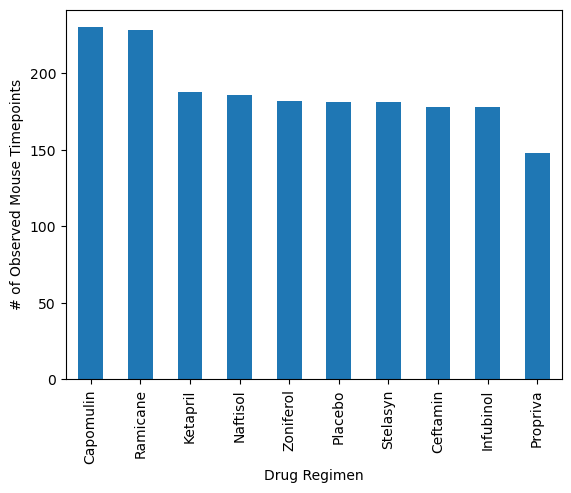

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

data_for_bar_plots = (dfc
  .groupby('Drug Regimen')
  [['Timepoint']]
  .count()
  .reset_index()
  .sort_values(
    by='Timepoint',
    ascending=False
))

data_for_bar_plots.plot(
    x ='Drug Regimen',
    y ='Timepoint',
    kind = 'bar',
    legend = False,
    ylabel = '# of Observed Mouse Timepoints'
)

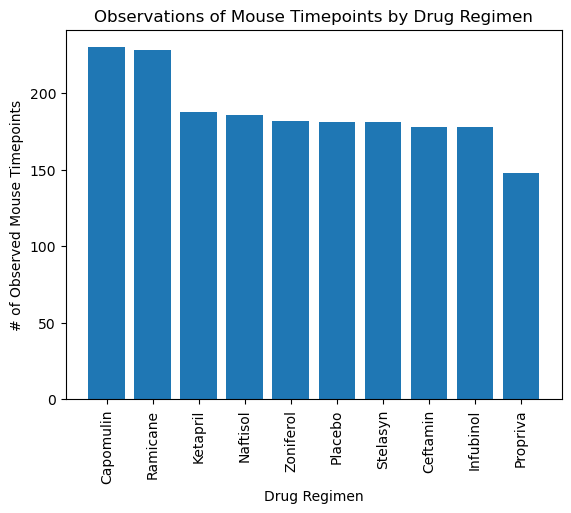

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(data_for_bar_plots['Drug Regimen'], data_for_bar_plots['Timepoint'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Observations of Mouse Timepoints by Drug Regimen')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

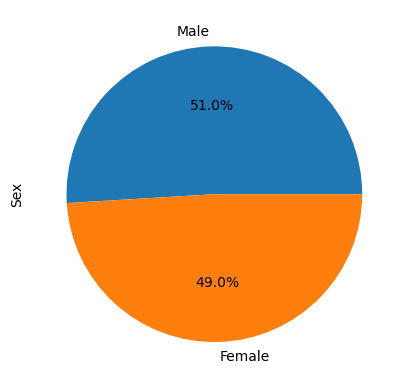

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_for_pie_chart = dfc.Sex.value_counts()

data_for_pie_chart.plot.pie(autopct="%.1f%%")


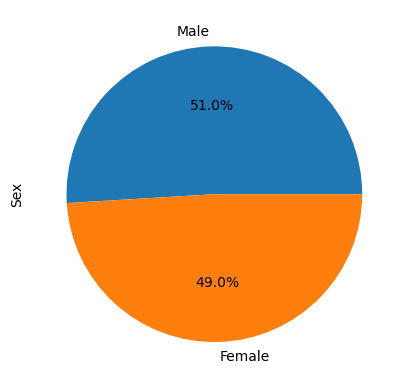

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(data_for_pie_chart, autopct="%.1f%%", labels=data_for_pie_chart.index)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

index = dfc.groupby('Mouse ID')['Timepoint'].idxmax()

final_tumor_vols = dfc.loc[index]

final_tumor_vols = final_tumor_vols[final_tumor_vols['Drug Regimen'].isin(treatments)]

final_tumor_vols



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

treatments = dfc['Drug Regimen'].unique()

quartiles = (
    final_tumor_vols
    .groupby('Drug Regimen')
    ['Tumor Volume (mm3)']
    .quantile([0,.25,.5,.75,1])
    .reset_index()
    .rename(columns = {'level_1': 'Quartile'})
    .pivot(
        index = 'Drug Regimen',
        columns = 'Quartile',
        values = 'Tumor Volume (mm3)'
    )
)

quartiles['IQR'] = quartiles[.75] - quartiles[.25]

quartiles



Quartile,0.0,0.25,0.5,0.75,1.0,IQR
Drug Regimen,,,,,,
Capomulin,23.343598,32.377357,38.125164,40.159220,47.685963,7.781863
Ceftamin,45.000000,48.722078,59.851956,64.299830,68.923185,15.577752
Infubinol,36.321346,54.048608,60.165180,65.525743,72.226731,11.477135
Ramicane,22.050126,31.560470,36.561652,40.659006,45.220869,9.098537


In [14]:
# find outliers (here, > 2 sigma within drug groups)

final_tumor_vols['zscore'] = (
  final_tumor_vols
  .groupby('Drug Regimen')
  ['Tumor Volume (mm3)']
  .transform(st.zscore)
)

final_tumor_vols['outlier'] = (
  final_tumor_vols['zscore']
  .apply(lambda x : abs(x)>2) 
)

final_tumor_vols.outlier.value_counts()

False    97
True      3
Name: outlier, dtype: int64

In [39]:
# outliers
final_tumor_vols.query('outlier == True')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,zscore,outlier
669,c326,Infubinol,Female,18,25,5,36.321346,0,-2.593016,True
9,k403,Ramicane,Male,21,16,45,22.050126,1,-2.544789,True
19,s185,Capomulin,Female,3,17,45,23.343598,1,-2.379400,True


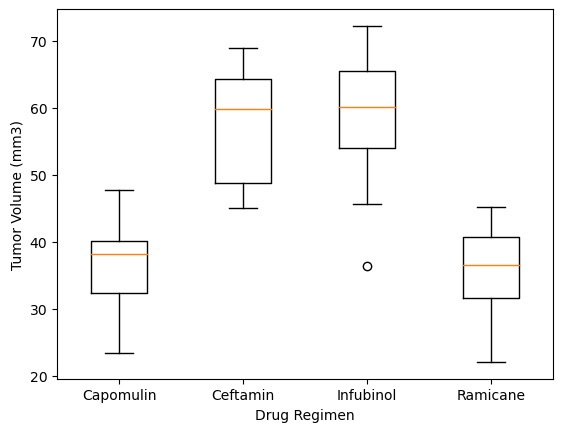

In [15]:
boxplot_df = final_tumor_vols[['Drug Regimen','Tumor Volume (mm3)']]

# turn into lists for boxplot
boxplot_grouped = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

fig, ax = plt.subplots()
ax.boxplot(boxplot_grouped.values)
ax.set_xticklabels(boxplot_grouped.index)

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

[Text(0.5, 0, 'Timepoint'),
 Text(0, 0.5, 'Tumor Volume (mm3)'),
 Text(0.5, 1.0, 'Capomulin treatment of mouse l509')]

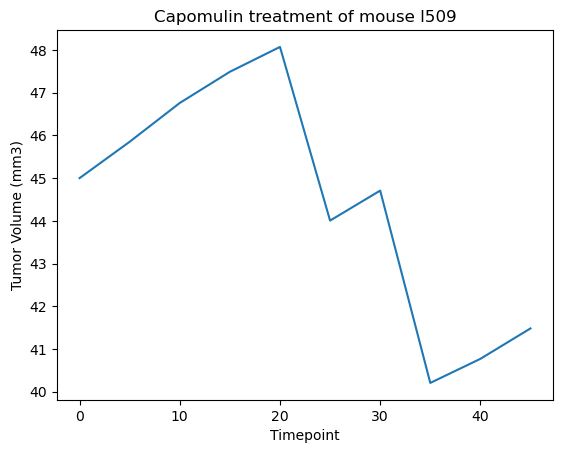

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_df = dfc.query("`Mouse ID` == 'l509'")

ax = plt.axes()

ax.plot(line_df['Timepoint'],line_df['Tumor Volume (mm3)'])

ax.set(
  xlabel='Timepoint',
  ylabel='Tumor Volume (mm3)',
  title='Capomulin treatment of mouse l509'
)



<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

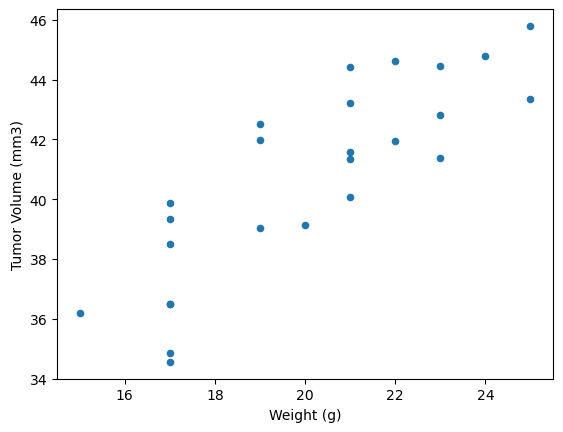

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatter_df = (
  dfc.query('`Drug Regimen` == "Capomulin"')
  [['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
  .groupby('Mouse ID')
  .mean()
)

scatter_df.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')


## Correlation and Regression

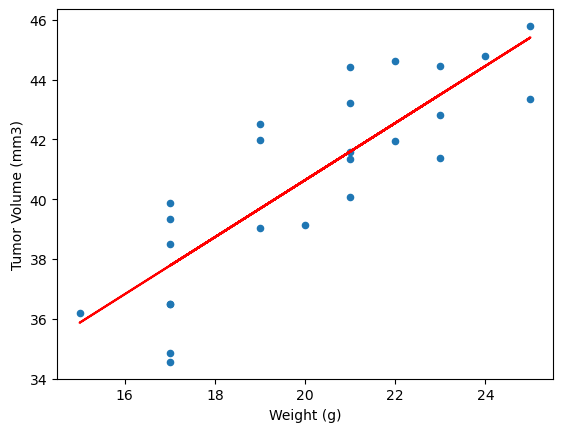

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

scatter_df.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')

slope, intercept, r_value, p_value, std_err = st.linregress(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)'])

line = slope * scatter_df['Weight (g)'] + intercept
plt.plot(scatter_df['Weight (g)'], line, color='red', label='Line of Best Fit')

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [42]:
# correlation coefficient (Pearson)

r_value

0.8419363424694721